In [1]:
using Plots
using StatsBase

using NBInclude
@nbinclude("localsearch.ipynb")
@nbinclude("testing_RM.ipynb")


In [2]:
n = 12
x = n

max_dcj_dist = n + x

target = generate_target_with_xdup(n, x)
src = scramble_target(target)

total_maps = max_dcj_dist
rand_maps = Integer(total_maps/2)
max_neighbors = 4

run_mode = "info"
dupchar_to_unique_chars = OrderedDict{Char, Vector{Char}}()
min_change_neighbor = true 

m = setmode(run_mode)  
_, P_dedup, map_to_dedupstr_dcjdist, S_dupchar_to_multiplicity, mapidx_to_char = generate_random_maps_and_calc_distances(src, target, rand_maps, dupchar_to_unique_chars, m)
_, _, _, map_to_dedupstr_dcjdist_MCN, diffs_MCN = localsearch(src, target, total_maps, rand_maps, max_neighbors, run_mode, dupchar_to_unique_chars, min_change_neighbor, [P_dedup, map_to_dedupstr_dcjdist, S_dupchar_to_multiplicity, mapidx_to_char])
_, _, _, map_to_dedupstr_dcjdist_OLD, diffs_OLD = localsearch(src, target, total_maps, rand_maps, max_neighbors, run_mode, dupchar_to_unique_chars, !min_change_neighbor, [P_dedup, map_to_dedupstr_dcjdist, S_dupchar_to_multiplicity, mapidx_to_char])


target
dup genes --> multiplicity
OrderedDict('b' => 2, 'f' => 2, 'a' => 4, 'h' => 3, 'g' => 2, 'i' => 3, 'l' => 3)

target map
[1, 1, 1, 1, 1, 1, 1]

source
dup genes --> multiplicity
OrderedDict('l' => 3, 'a' => 4, 'i' => 3, 'h' => 3, 'b' => 2, 'g' => 2, 'f' => 2)

deduplication of RM
[1, 8, 3, 6, 2, 2, 2] lsqprnoaimxyd,.ekcbgvfh.,.jut. --> bfaqchdieygomprtlnsvxjku 23
[6, 16, 1, 5, 1, 2, 2] usbpritonhxyd,.ekcqgvfm.,.jla. --> bfaqchdieygomprtlnsvxjku 22
[5, 15, 1, 4, 1, 1, 1] ulbgmitonrxfd,.ekcqpayh.,.jsv. --> bfaqchdieygomprtlnsvxjku 21
[4, 13, 1, 3, 2, 2, 1] suqpmitanhxfd,.ekcbgoyr.,.jlv. --> bfaqchdieygomprtlnsvxjku 22
[1, 10, 2, 1, 2, 1, 2] lsqghiotxmnyd,.ekcbpvfr.,.jua. --> bfaqchdieygomprtlnsvxjku 23
[6, 8, 3, 3, 2, 2, 1] usqpmnoaihxfd,.ekcbgvyr.,.jlt. --> bfaqchdieygomprtlnsvxjku 24
[5, 20, 1, 5, 1, 1, 2] ulbgrivanhxyd,.ekcqptfm.,.jso. --> bfaqchdieygomprtlnsvxjku 24
[3, 6, 2, 1, 2, 1, 1] slqghiavxmnfd,.ekcbptyr.,.juo. --> bfaqchdieygomprtlnsvxjku 22
[2, 8, 1, 5, 1, 2, 2] lubpr

(19, [2, 8, 2, 5, 1, 2, 2], "lubprioaxhnyd,.ekcqgvfm.,.jst.", Dict([5, 20, 1, 5, 1, 1, 2] => ("ulbgrivanhxyd,.ekcqptfm.,.jso.", 24), [5, 23, 1, 3, 1, 1, 2] => ("ulbgmivtnhxyd,.ekcqpafr.,.jso.", 21), [2, 8, 2, 5, 1, 1, 2] => ("lubgrioaxhnyd,.ekcqpvfm.,.jst.", 21), [1, 8, 3, 6, 2, 2, 2] => ("lsqprnoaimxyd,.ekcbgvfh.,.jut.", 23), [6, 16, 1, 5, 1, 2, 2] => ("usbpritonhxyd,.ekcqgvfm.,.jla.", 22), [1, 15, 1, 4, 2, 1, 1] => ("lsqgmitonrxfd,.ekcbpayh.,.juv.", 23), [2, 8, 3, 5, 1, 2, 2] => ("lubprnoaihxyd,.ekcqgvfm.,.jst.", 21), [1, 10, 2, 1, 2, 1, 2] => ("lsqghiotxmnyd,.ekcbpvfr.,.jua.", 23), [2, 8, 1, 5, 1, 2, 2] => ("lubprioanhxyd,.ekcqgvfm.,.jst.", 21), [3, 8, 1, 5, 1, 2, 2] => ("slbprioanhxyd,.ekcqgvfm.,.jut.", 21)…), [2, 0, 2, 0, 0, -2, 0, 0, 2, 2, 2, 2])

DCJ Distance Distributions for RM, LS w OLD neighbor, LS w MCN definitions (same params)

In [3]:
function remove_rand_maps(map_to_dedupstr_dcjdist, map_to_dedupstr_dcjdist_neighbors) 
    nbr_dists = Vector{Int}() 
    for (m, d) in map_to_dedupstr_dcjdist_neighbors
        if m in keys(map_to_dedupstr_dcjdist)
            continue 
        end 
        push!(nbr_dists, d[2])
    end
    return nbr_dists
end 

remove_rand_maps (generic function with 1 method)

max dcj dist=24

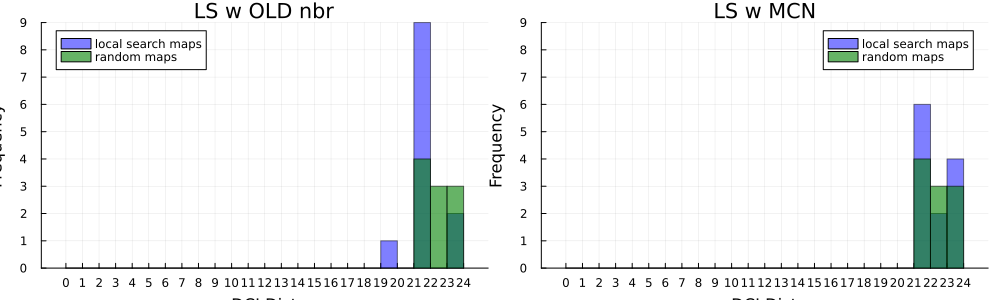

In [11]:
xticks = collect(0:max_dcj_dist)
bins_range = range(0, maximum(max_dcj_dist), maximum(max_dcj_dist)+1)

## 2 GRAPHS 

# defining DCJ distance datasets  
RM_dcjdists = [tupl[2] for tupl in values(map_to_dedupstr_dcjdist)]

# only neighbors (mixed colors)
OLD_dcjdists = remove_rand_maps(map_to_dedupstr_dcjdist, map_to_dedupstr_dcjdist_OLD)
MCN_dists = remove_rand_maps(map_to_dedupstr_dcjdist, map_to_dedupstr_dcjdist_MCN)

# RM & neighbors (overlay) 
# OLD_dcjdists = [tupl[2] for tupl in values(map_to_dedupstr_dcjdist_OLD)]
# MCN_dists = [tupl[2] for tupl in values(map_to_dedupstr_dcjdist_MCN)]


# plot details
mode_OLD = count(x -> x == mode(OLD_dcjdists), OLD_dcjdists)
mode_MCN = count(x -> x == mode(MCN_dists), MCN_dists)
max_freq = maximum([mode_OLD, mode_MCN])
yticks = collect(0:max_freq+1)
ylims=(0,max_freq)

# LS w OLD  
h1 = histogram(OLD_dcjdists, xticks=xticks, ylims=ylims, yticks=yticks, bins=bins_range, title="LS w OLD nbr", label="local search maps", xlabel="DCJ Dist", ylabel="Frequency", alpha=0.5, color=:blue)
histogram!(h1, RM_dcjdists, xticks=xticks, bins=bins_range, label="random maps", alpha=0.6, color=:green)

# LS w MCN 
h2 = histogram(MCN_dists, xticks=xticks, ylims=ylims, yticks=yticks, bins=bins_range, title="LS w MCN", label="local search maps", xlabel="DCJ Dist", ylabel="Frequency", alpha=0.5, color=:blue)
histogram!(h2, RM_dcjdists, xticks=xticks, bins=bins_range, label="random maps", alpha=0.6, color=:green)

print("max dcj dist=", max_dcj_dist)
plot(h1, h2, layout=(1, 2), size=(1000, 300))



In [5]:
## 3 SEPARATE GRAPHS 
# RM  
# RM_dcjdists = [tupl[2] for tupl in values(map_to_dedupstr_dcjdist)]
# h1 = histogram(RM_dcjdists, xticks=xticks, bins=bins_range, title="Random Maps", label="Maps", xlabel="DCJ Dist", ylabel="Frequency", alpha=0.5, color=:blue)

# # LS w OLD  
# OLD_dcjdists = remove_rand_maps(map_to_dedupstr_dcjdist, map_to_dedupstr_dcjdist_OLD)
# h2 = histogram(OLD_dcjdists, xticks=xticks, bins=bins_range, title="LS w OLD nbr", label="local search maps", xlabel="DCJ Dist", ylabel="Frequency", alpha=0.5, color=:green)

# # LS w MCN 
# MCN_dists = remove_rand_maps(map_to_dedupstr_dcjdist, map_to_dedupstr_dcjdist_MCN)
# h3 = histogram(MCN_dists, xticks=xticks, bins=bins_range, title="LS w MCN", label="local search maps", xlabel="DCJ Dist", ylabel="Frequency", alpha=0.5, color=:red)
# # histogram!(h3, rm_dcj_dists, xticks=xticks, bins=bins_range, label="random maps", alpha=0.5, color=:green)

# # plot 
# print("max dcj dist=", max_dcj_dist)
# plot(h1, h2, h3, layout=(1, 3), size=(1500, 400))


# 1 GRAPH 
# RM_dcjdists = [tupl[2] for tupl in values(map_to_dedupstr_dcjdist)]
# h1 = histogram(RM_dcjdists, xticks=xticks, bins=bins_range, title="RM vs LS w OLD vs LS w MCN", label="random maps", xlabel="DCJ Dist", ylabel="Frequency", alpha=0.5, color=:blue)

# # LS w OLD  
# OLD_dcjdists = remove_rand_maps(map_to_dedupstr_dcjdist, map_to_dedupstr_dcjdist_OLD)
# histogram!(h1, OLD_dcjdists, xticks=xticks, bins=bins_range, label="local search with OLD", alpha=0.5, color=:green)

# # LS w MCN 
# MCN_dists = remove_rand_maps(map_to_dedupstr_dcjdist, map_to_dedupstr_dcjdist_MCN)
# histogram!(h1, MCN_dists, xticks=xticks, bins=bins_range, label="local search with MCN",alpha=0.6, color=:black)


Distribution of DCJ distance differences (new neighbor - original neighbor) for the two definitions of neighbors

new neighbor - original neighbor::
old diffs=[2, 0, 2, 0, 0, -2, 0, 0, 2, 2, 2, 2]
MCN diffs=[0, 2, 0, 0, 1, 0, 1, 0, 2, 2, 2, 0]


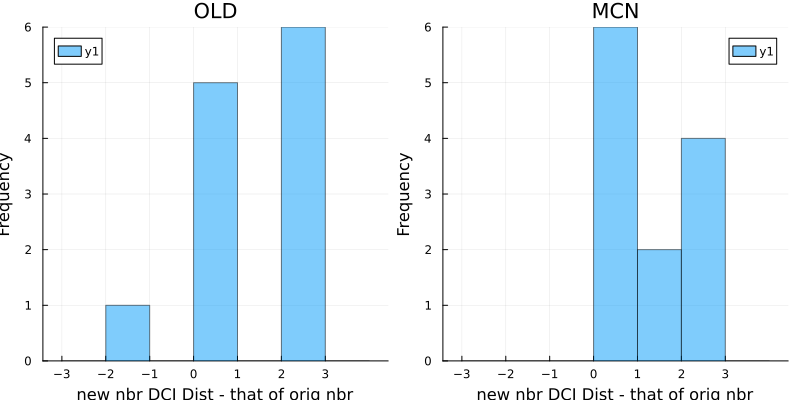

In [6]:
# y axis 
mode_freq_OLD = count(x -> x == mode(diffs_OLD), diffs_OLD)
mode_freq_MCN = count(x -> x == mode(diffs_MCN), diffs_MCN)
max_freq = maximum([mode_freq_OLD, mode_freq_MCN])
ylims=(0,max_freq)
yticks = collect(0:max_freq+1)

# x axis 
max_diff = maximum([maximum(diffs_OLD), maximum(diffs_MCN)])
min_diff = minimum([minimum(diffs_OLD)-1, minimum(diffs_MCN)-1, 0])
bins_range = range(min_diff, max_diff+2)
xticks = collect(min_diff:max_diff+1)

h1 = histogram(diffs_OLD, title="OLD", alpha=0.5, bins=bins_range, xticks=xticks, yticks=yticks, ylims=ylims, xlabel="new nbr DCJ Dist - that of orig nbr", ylabel="Frequency")
h2 = histogram(diffs_MCN, title="MCN",  alpha=0.5, bins=bins_range, xticks=xticks, yticks=yticks, ylims=ylims, xlabel="new nbr DCJ Dist - that of orig nbr", ylabel="Frequency")

println("new neighbor - original neighbor::")
println("old diffs=", diffs_OLD)
println("MCN diffs=", diffs_MCN)

plot(h1, h2, layout=(1, 2), size=(800, 400))

3D plot of the difference (mean difference between new_neighbor - old_neighbor ; OLD defn) - (mean difference between new_neighbor - old_neighbor ; MGN defn) 

over varying values for rand_maps, max_neighbors

In [7]:
function test_LS(rand_maps::Int, max_neighbors::Int, src::String, target::String, run_mode::String, dupchar_to_unique_chars::OrderedDict{Char, Vector{Char}}, min_change_neighbor::Bool)
    diff_data = zeros(rand_maps, max_neighbors)

    for rm in 1:rand_maps 
        for n in 1:max_neighbors
            # println("(", rm, ", ", n, ")")

            m = setmode(run_mode)  
            _, P_dedup, map_to_dedupstr_dcjdist, S_dupchar_to_multiplicity, mapidx_to_char = generate_random_maps_and_calc_distances(src, target, rand_maps, dupchar_to_unique_chars, m)
            _, _, _, map_to_dedupstr_dcjdist_MCN, diffs_MCN = localsearch(src, target, total_maps, rand_maps, max_neighbors, run_mode, dupchar_to_unique_chars, min_change_neighbor, [P_dedup, map_to_dedupstr_dcjdist, S_dupchar_to_multiplicity, mapidx_to_char])
            _, _, _, map_to_dedupstr_dcjdist_OLD, diffs_OLD = localsearch(src, target, total_maps, rand_maps, max_neighbors, run_mode, dupchar_to_unique_chars, !min_change_neighbor, [P_dedup, map_to_dedupstr_dcjdist, S_dupchar_to_multiplicity, mapidx_to_char])
            
            # println("new neighbor - original neighbor::")
            # println("old diffs=", diffs_OLD)
            # println("MCN diffs=", diffs_MCN)

            # mean
            avg_OLD = mean(diffs_OLD)
            avg_MCN = mean(diffs_MCN)
            mean_diff = avg_OLD - avg_MCN 

            diff_data[rm, n] = mean_diff

            # min
            # min_OLD = minimum(diffs_OLD)
            # min_MCN = minimum(diffs_MCN)
            # min_diff = min_OLD - min_MCN 

            # diff_data[rm, n] = min_diff

            # median 
            # med_OLD = minimum(diffs_OLD)
            # med_MCN = minimum(diffs_MCN)
            # med_diff = med_OLD - med_MCN 

            # diff_data[rm, n] = med_diff


        end 
    end 
    return diff_data
end 

test_LS (generic function with 1 method)


avg diff = 0.11531190926275993
median diff = 0.0


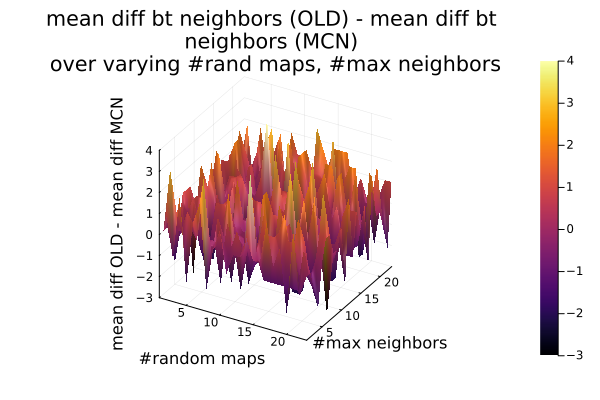

In [8]:
n = 12
x = n

max_dcj_dist = n + x

target = generate_target_with_xdup(n, x)
src = scramble_target(target)

run_mode = "none"
dupchar_to_unique_chars = OrderedDict{Char, Vector{Char}}()
min_change_neighbor = true 

total_maps = max_dcj_dist  # max
rand_maps = total_maps-1
max_neighbors = total_maps-1

mean_diff_data = test_LS(rand_maps, max_neighbors, src, target, run_mode, dupchar_to_unique_chars, min_change_neighbor)

# plot 
x = 1:rand_maps 
y = 1:max_neighbors
z = mean_diff_data

avg_diff = mean(mean_diff_data)
median_diff = median(mean_diff_data)

println("\navg diff = ", avg_diff) 
println("median diff = ", median_diff)

xyplane = zeros(length(x), length(y))  
plot(x, y, z, st=:surface, title="mean diff bt neighbors (OLD) - mean diff bt \nneighbors (MCN) \nover varying #rand maps, #max neighbors", xlabel="#random maps", ylabel="#max neighbors", zlabel="mean diff OLD - mean diff MCN")
# diff = new_neighbor - old_neighbor

# plot!(p, x, y, z, st=:surface, label="Surface Plot")
